# Dataset 4

## https://archive.ics.uci.edu/dataset/301/parkinson+speech+dataset+with+multiple+types+of+sound+recordings

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('../Dataframes/dataset4.csv')
cols = ['subject_id', 'jitter_local', 'jitter_local_absolute', 'jitter_rap', 'jitter_ppq5', 'jitter_ddp', 'shimmer_local', 
        'shimmer_local_db', 'shimmer_apq3', 'shimmer_apq5', 'shimmer_apq11', 'shimmer_dda', 'ac', 'nth', 'htn', 'median_pitch', 
        'mean_pitch', 'standard_deviation', 'minimum_pitch', 'maximum_pitch', 'number_of_pulses', 'number_of_periods', 'mean_period', 
        'standard_deviation_of_period', 'fraction_of_locally_unvoiced_frames', 'number_of_voice_breaks', 'degree_of_voice_breaks', 
        'updrs', 'class_information']
data.columns = cols
data.head()
data.head()

subject_id  jitter_local  jitter_local_absolute  jitter_rap  jitter_ppq5  \
0           1         0.728               0.000038       0.353        0.376   
1           1         1.220               0.000074       0.732        0.670   
2           1         2.502               0.000123       1.156        1.634   
3           1         3.509               0.000167       1.715        1.539   
4           1         2.470               0.000126       1.358        1.341   

   jitter_ddp  shimmer_local  shimmer_local_db  shimmer_apq3  shimmer_apq5  \
0       1.059          5.864             0.642         2.058         3.180   
1       2.196          8.719             0.875         4.347         5.166   
2       3.469         13.513             1.273         5.263         8.771   
3       5.145          9.112             1.040         3.102         4.927   
4       4.075         10.696             1.256         5.262         7.076   

   ...  maximum_pitch  number_of_pulses  number_of_periods  mean_period  \
0  ...        234.505               170                169     0.005181   
1  ...        211.442              1431               1427     0.006071   
2  ...        220.230                94                 92     0.004910   
3  ...        225.162               117                114     0.004757   
4  ...        202.812                74                 73     0.005118   

   standard_deviation_of_period  fraction_of_locally_unvoiced_frames  \
0                      0.000403                                2.247   
1                      0.000474                               10.656   
2                      0.000320                                0.000   
3                      0.000380                               18.182   
4                      0.000187                               23.214   

   number_of_voice_breaks  degree_of_voice_breaks  updrs  class_information  
0                       0                   0.000     23                1.0  
1                       1                   0.178     23                1.0  
2                       0                   0.000     23                1.0  
3                       1                  13.318     23                1.0  
4                       0                   0.000     23                1.0  

[5 rows x 29 columns]

In [3]:
data.shape

(1207, 29)

In [4]:
data.fillna(0, inplace = True) #Infered form a research paper based on the dataset


## XGBoost

In [5]:
import pandas as pd
import numpy as np

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [6]:
data4 = data.copy()
data4 = data4.drop(['subject_id'], axis = 1)

In [7]:
X = data4.drop(['class_information'], axis = 1)
y = data4['class_information']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 45)

XGB_classifier = XGBClassifier(random_state=45)

XGB_classifier.fit(X_train, y_train)

y_pred = XGB_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the XGBoost Classifier: {accuracy:.2f}')

Accuracy of the XGBoost Classifier: 1.00


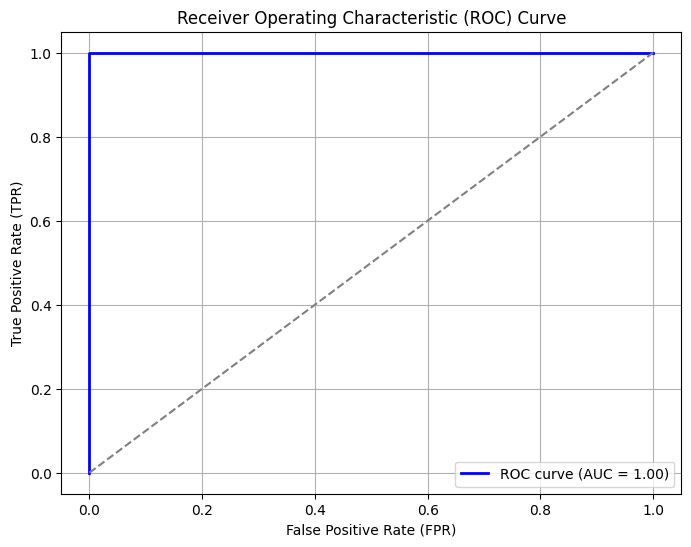

In [8]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Support Vector Machine

In [9]:
import pandas as pd
import numpy as np

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [10]:
data4 = data.copy()
data4 = data4.drop(['subject_id'], axis = 1)

### Linear

In [11]:
X = data4.drop(['class_information'], axis = 1)
y = data4['class_information']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 45)

SVM_classifier = SVC(random_state=45, kernel = 'linear')

SVM_classifier.fit(X_train, y_train)

y_pred = SVM_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the SVM Classifier: {accuracy:.2f}')


Accuracy of the SVM Classifier: 1.00


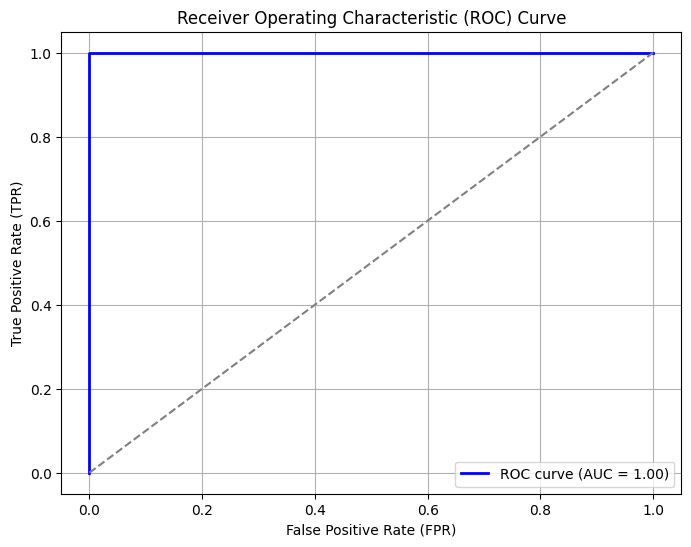

In [12]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Polynomial

In [13]:
X = data4.drop(['class_information'], axis = 1)
y = data4['class_information']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 45)

SVM_classifier = SVC(random_state=45, kernel = 'poly')

SVM_classifier.fit(X_train, y_train)

y_pred = SVM_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the SVM Classifier: {accuracy:.2f}')


Accuracy of the SVM Classifier: 0.83


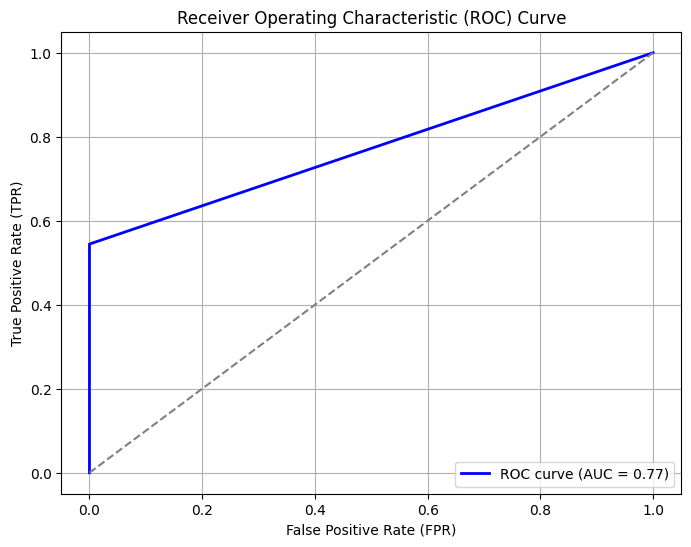

In [14]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Radial Basis Function

In [15]:
X = data4.drop(['class_information'], axis = 1)
y = data4['class_information']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 45)

SVM_classifier = SVC(random_state=45, kernel = 'rbf')

SVM_classifier.fit(X_train, y_train)

y_pred = SVM_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the SVM Classifier: {accuracy:.2f}')


Accuracy of the SVM Classifier: 0.87


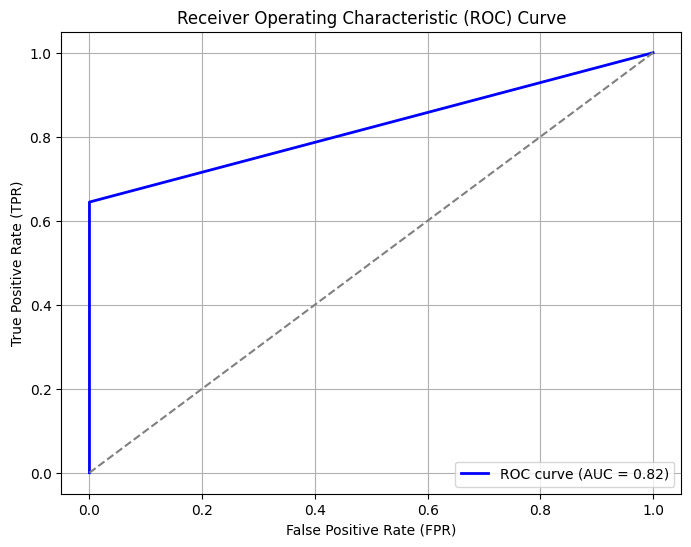

In [16]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Sigmoid Kernel

In [17]:
X = data4.drop(['class_information'], axis = 1)
y = data4['class_information']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 45)

SVM_classifier = SVC(random_state=45, kernel = 'sigmoid')

SVM_classifier.fit(X_train, y_train)

y_pred = SVM_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the SVM Classifier: {accuracy:.2f}')


Accuracy of the SVM Classifier: 0.51


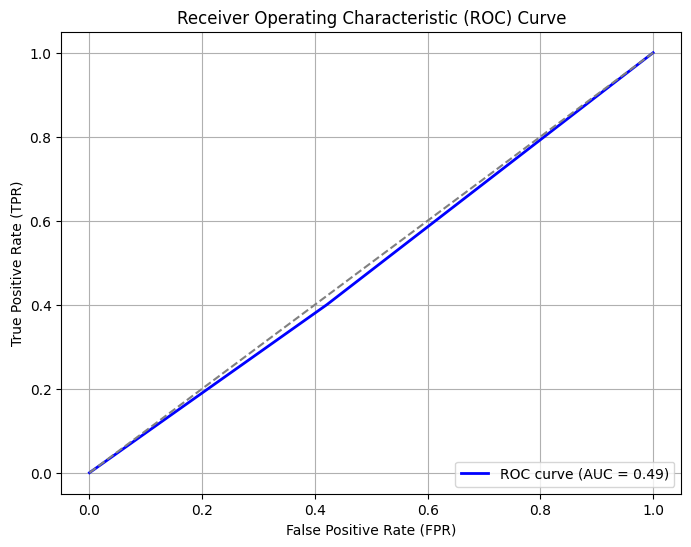

In [18]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Random Forest

In [19]:
import pandas as pd
import numpy as np

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [20]:
data4 = data.copy()
data4 = data4.drop(['subject_id'], axis = 1)

### GINI Index

In [21]:
X = data4.drop(['class_information'], axis = 1)
y = data4['class_information']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 45)

RF_Classifier = RandomForestClassifier(n_estimators = 100, random_state = 45, criterion = 'gini', max_depth = 2)

RF_Classifier.fit(X_train, y_train)

y_pred = RF_Classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the Random Forest Classifier: {accuracy:.2f}')

Accuracy of the Random Forest Classifier: 0.97


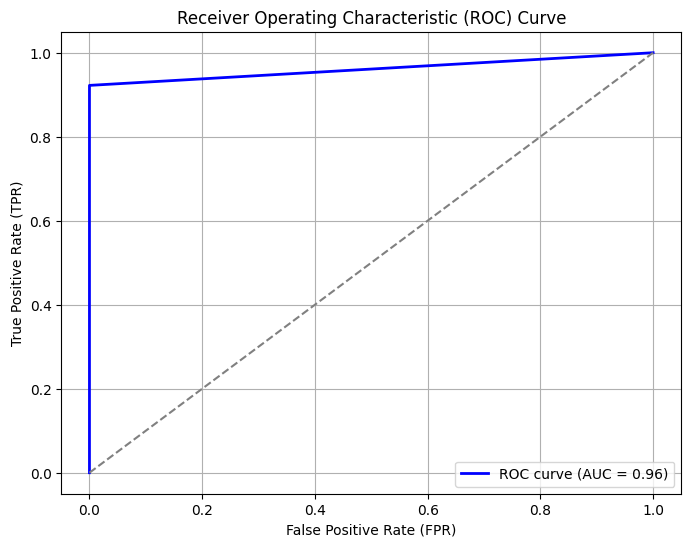

In [22]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

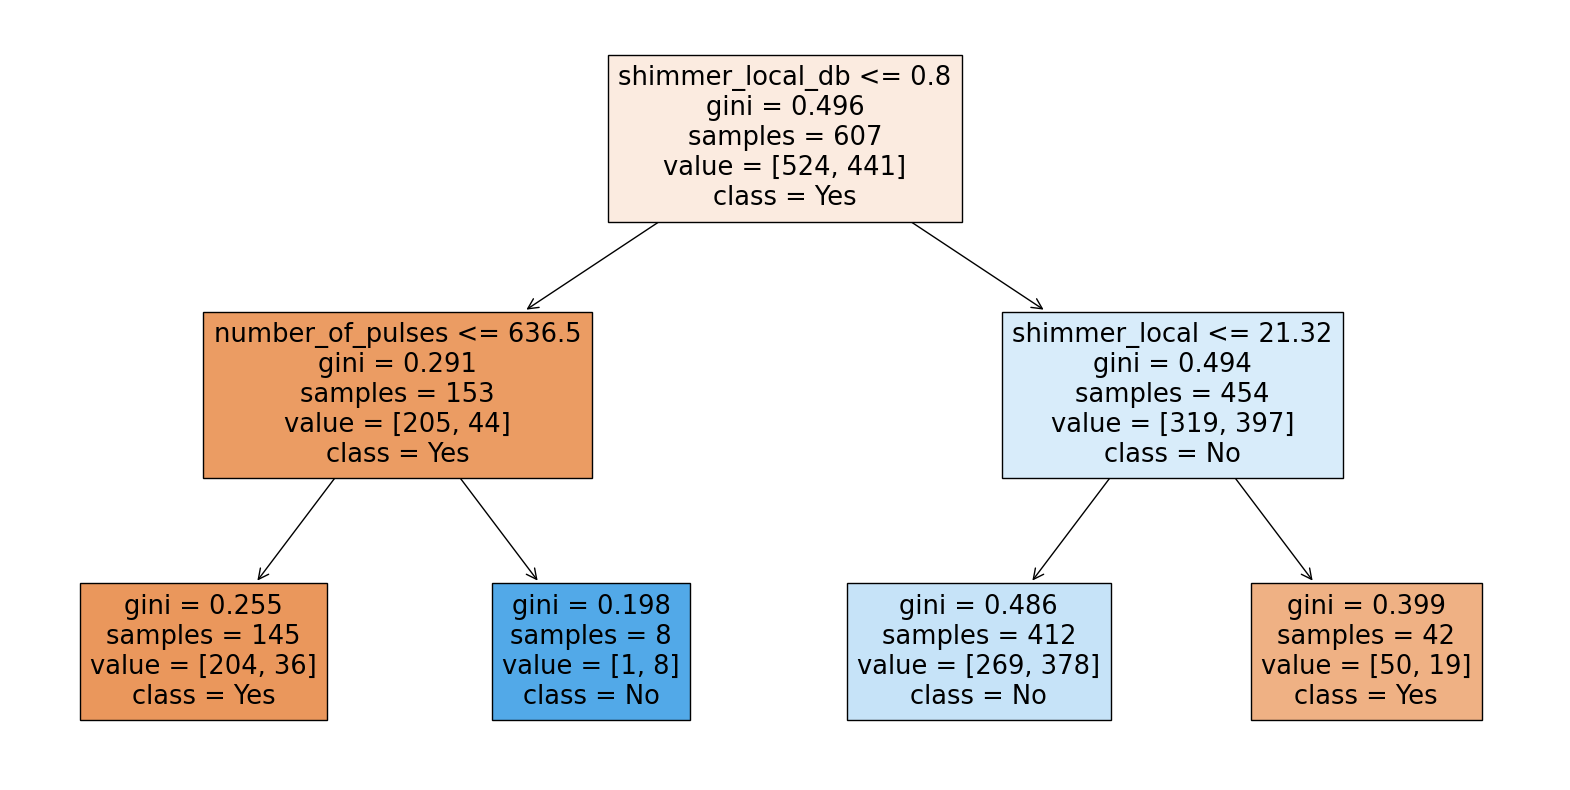

In [23]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(RF_Classifier.estimators_[0], feature_names = data4.columns, class_names = ['Yes', 'No'], filled = True)
plt.show()

### Entropy

In [24]:
X = data4.drop(['class_information'], axis = 1)
y = data4['class_information']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 45)

RF_Classifier = RandomForestClassifier(n_estimators = 100, random_state = 45, criterion = 'entropy', max_depth = 2)

RF_Classifier.fit(X_train, y_train)

y_pred = RF_Classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the Random Forest Classifier: {accuracy:.2f}')

Accuracy of the Random Forest Classifier: 0.97


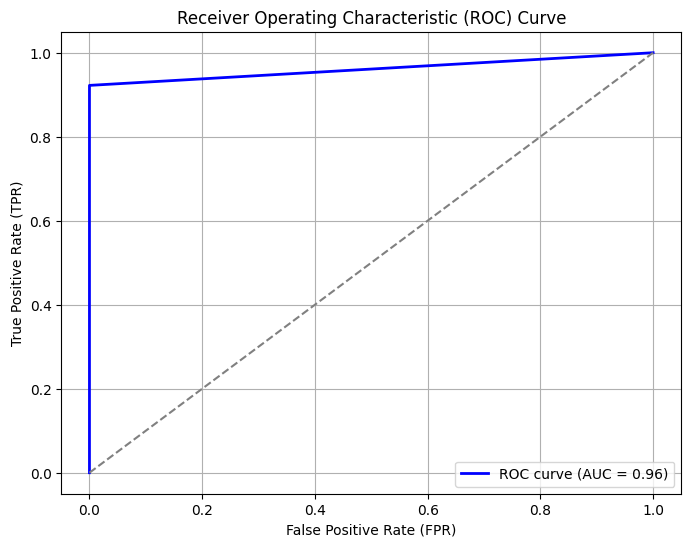

In [25]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

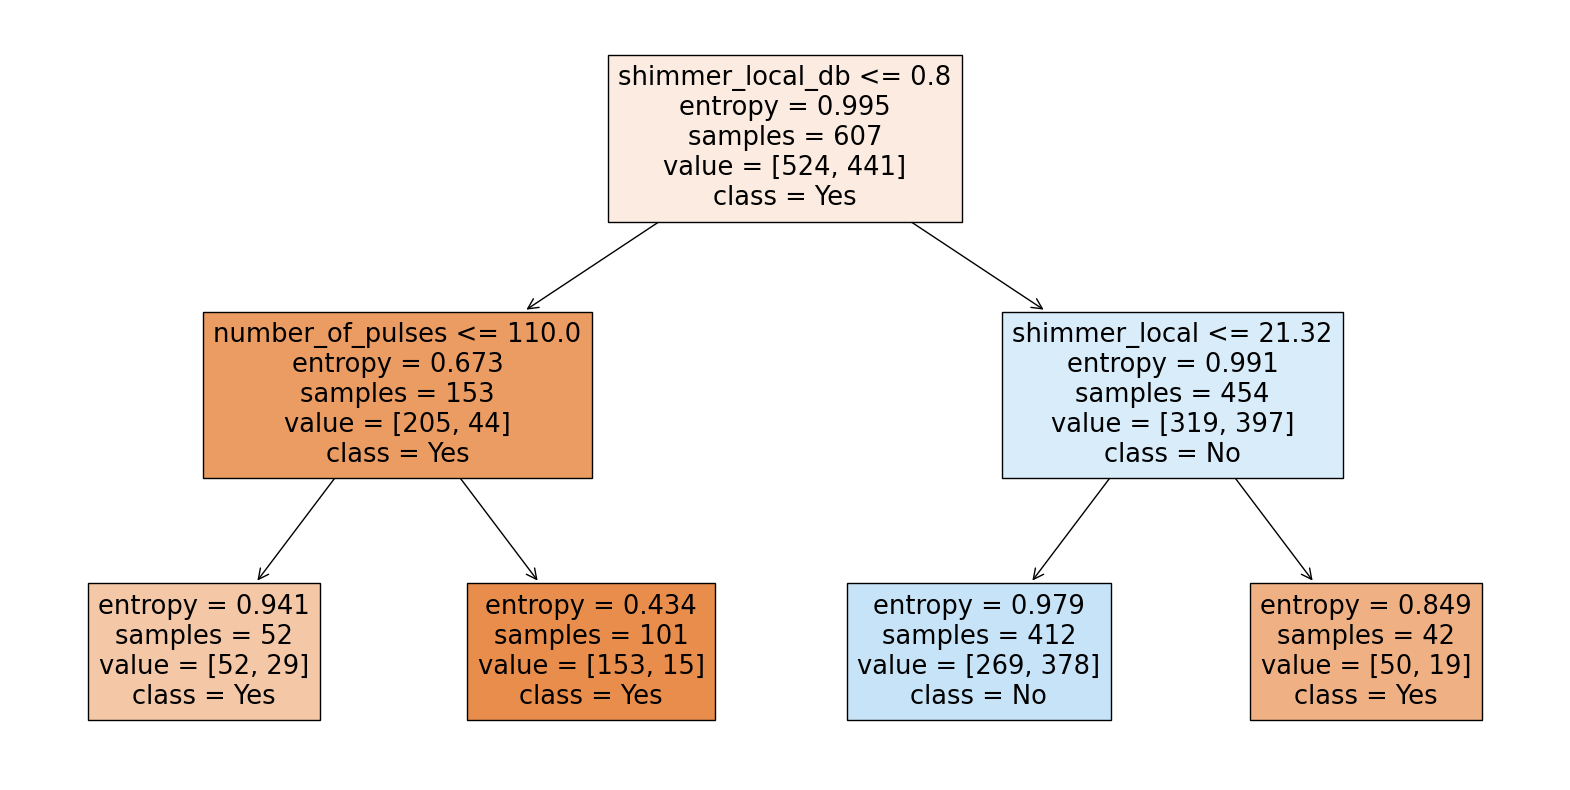

In [26]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(RF_Classifier.estimators_[0], feature_names = data4.columns, class_names = ['Yes', 'No'], filled = True)
plt.show()

## Naive Bayes

In [27]:
import pandas as pd
import numpy as np

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [28]:
data4 = data.copy()
data4 = data4.drop(['subject_id'], axis = 1)

In [29]:
X = data4.drop(['class_information'], axis = 1)
y = data4['class_information']

scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 45)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Naive_Bayes_classifier = GaussianNB()

Naive_Bayes_classifier.fit(X_train, y_train)

y_pred = Naive_Bayes_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the XGBoost Classifier: {accuracy:.2f}')

Accuracy of the XGBoost Classifier: 1.00


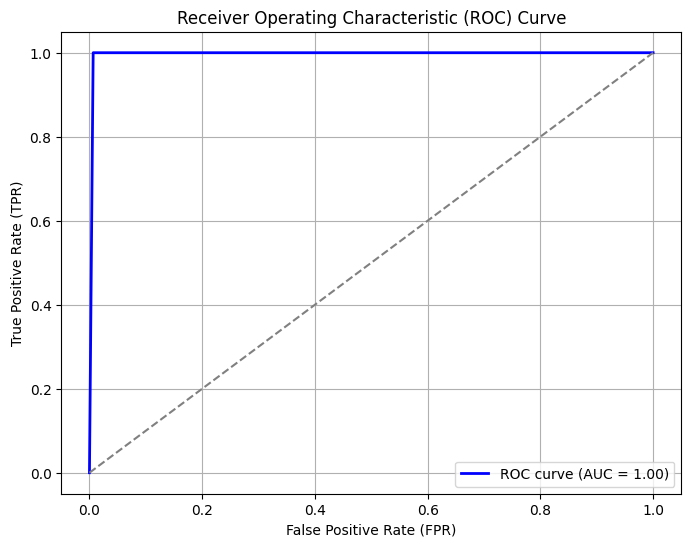

In [30]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## KNN

In [31]:
import pandas as pd
import numpy as np

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [32]:
data4 = data.copy()
data4 = data4.drop(['subject_id'], axis = 1)

In [33]:
X = data4.drop(['class_information'], axis = 1)
y = data4['class_information']

scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 45)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_classifier = KNeighborsClassifier(n_neighbors=3)

knn_classifier.fit(X_train_scaled, y_train)

y_pred = knn_classifier.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the KNN Classifier: {accuracy:.2f}')

Accuracy of the KNN Classifier: 0.91


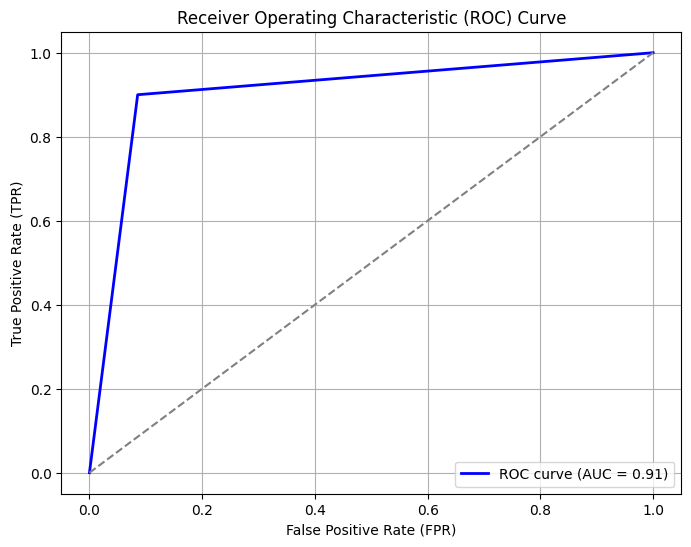

In [34]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Combined analaysis